# Neural network from Scratch

In this notebook, I build the neural network in pure Python and numpy library. It is a one-hidden-layer network with 3 neurons, trained for 1500 iterations. 

In [89]:
"""My own neural network from scratch."""

import numpy as np


def sig(s):
    """Sigmoid function."""
    return 1 / (1 + np.exp(-s))


def sig_inv(s):
    """Sigmoid derivative function."""
    return sig(s) * (1 - sig(s))


class NeuralNetwork:
    """Neural Network class."""

    def __init__(self, x, y):
        """Constructor."""
        self.x = x
        self.y = y
        self.w1 = np.random.rand(self.x.shape[1], 3)
        self.w2 = np.random.rand(3, 1)

        self.alpha = 3
        self.loss = []

    def forward(self):
        """Feed Forward."""
        self.s1 = self.x.dot(self.w1)
        self.z1 = sig(self.s1)
        self.s2 = self.z1.dot(self.w2)
        self.z2 = sig(self.s2)

        self.loss.append(1 / 2 * ((self.z2 - self.y) ** 2).sum())

    def backward(self):
        """Backward Propagation."""
        d_w1 = np.dot(
            self.x.T,
            np.dot(
                (self.z2 - self.y) * sig_inv(self.s2),
                self.w2.T
            ) * sig_inv(self.s1)
        )

        d_w2 = np.dot(
            self.z1.T,
            (self.z2 - self.y) * sig_inv(self.s2)
        )

        self.w1 -= self.alpha * d_w1
        self.w2 -= self.alpha * d_w2


if __name__ == "__main__":
    X = np.array([[1, 0, 0, 1],
                  [1, 0, 1, 1],
                  [1, 1, 0, 1],
                  [1, 1, 1, 1]])
    y = np.array([[0],
                  [1],
                  [1],
                  [0]])
    nn = NeuralNetwork(X, y)

    for i in range(1500):
        nn.forward()
        nn.backward()

    print(nn.z2)


[[0.00668569]
 [0.97393156]
 [0.97419638]
 [0.03085522]]


## Plotting Loss Function

In [90]:
import matplotlib.pyplot as plt

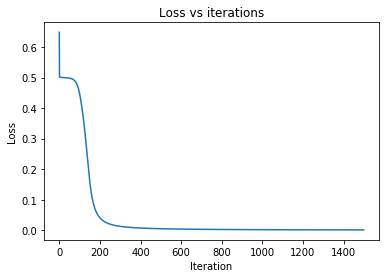

In [91]:
plt.title('Loss vs iterations')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.plot(nn.loss);